## Introduction

In this notebook, I will walk you through the comprehensive analysis and recommendations for purchasing and operating aircraft with the lowest risk. This initiative is part of our strategic move to diversify into new industries, and we aim to provide you with data-driven insights to make informed decisions.

## Business Understanding

As our company diversifies into new industries, we explore the potential of purchasing and operating aircraft for commercial and private enterprises. This strategic move requires a deep understanding of the risks to ensure informed decision-making. 

Our goal is to select aircraft that meet our operational needs and have a proven track record of safety.

### Main Objective

Our main objective is to identify the aircraft models with the lowest risk profiles based on historical accident data.

In our endeavor to diversify our company's portfolio by venturing into the aviation industry, it is crucial to base our investment decisions on solid, data-driven insights. 

The aviation sector, while promising, involves significant risks due to the nature of air travel and the complexities involved in operating aircraft. Therefore, understanding and mitigating these risks is essential for the success and safety of our operations.

### Specific Objective

- Which aircraft models have the lowest accident rates?
- How do the total fatalities and serious injuries vary across the aircraft models?
- What impact do weather conditions have on the accident rates of various aircraft models?
- How have accident rates for specific aircraft models changed over the past 20 years?
- Which aircraft models demonstrate the best safety records and reliability based on historical data?
- Are there certain aircraft models that consistently perform better in terms of safety across different conditions?

## Data Understanding

**Description**

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) and includes detailed information on aviation accidents from 1962 to 2023. This dataset contains critical information that can help us analyze and understand the risks associated with different aircraft models.

**Attributes**

The dataset has 9 key attributes. Here's a breakdown of the attributes and what they represent:

- Accident and incident dates - The date of the accident or incident occurred.
- Aircraft manufacturer(make) and model - The manufacturer(make) and model of the aircraft involved in the accident.
- Injury severities - The number of fatalities and serious injuries resulting from the accident.
- Weather conditions - The weather conditions at the time of the accident.
- Locations - The geographical location where the accident occurred.
- Investigation Type - Indicates whether the record is an accident or incident.
- Accident Number - An internal identifier used by the reporting authority.
- Airport Code - The details about the airport involved.
- Purpose of Flight - The intended purpose of the flight (e.g., personal, commercial).

## Data Importation

In [101]:
# Run this cell without changes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots remain within the notebook
%matplotlib inline

In [102]:
# Loading the data
df = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)

# First Five Rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Wrangling

### Completeness

In [103]:
# To ensure the completeness of our dataset, we addressed the missing values in critical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [92]:
# Fill missing values in injury columns with 0
df = df.assign(total_fatal_injuries=df['Total.Fatal.Injuries'].fillna(0), total_serious_injuries=df['Total.Serious.Injuries'].fillna(0))

# Convert 'Event.Date' to datetime, coercing errors to NaT
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Display the first few rows to verify changes
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,total_fatal_injuries,total_serious_injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1.0,2.0


The columns Total.Fatal.Injuries and Total.Serious.Injuries contain information about the number of fatalities and serious injuries in each aviation event. To maintain data integrity and ensure accurate analysis, we replaced any missing values (NaN) in these columns with 0. This approach assumes that if no value is reported, it implies there were no fatalities or serious injuries.

### Consistency

In [93]:
# Ensure consistent data types for the injury columns.
df['total_fatal_injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['total_serious_injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,total_fatal_injuries,total_serious_injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1.0,2.0


To maintain data integrity and consistency, we convert the Total.Fatal.Injuries and Total.Serious.Injuries columns to numeric data types. This ensures that all values in these columns are treated as numerical data, allowing for accurate calculations and statistical analysis. Any invalid entries are coerced to NaN.

### Validity

In [104]:
# Filtering data for the last 20 years
recent_data = df[df['Event.Date'] >= '2004-01-01']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


By filtering the data to include only records from the past 20 years, we ensure that our analysis is based on the most recent and relevant data. This helps in understanding current trends and making informed decisions based on up-to-date information.

### Uniformity

In [105]:
# Standardize column names to lowercase and replace spaces with underscores.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
recent_data.columns = recent_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Replace infinity values with NaN
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Verify column names
print(df.columns)

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')


We standardize the column names by converting them to lowercase, stripping any leading or trailing whitespace, and replacing spaces with underscores. This makes the column names consistent and easier to reference in our analysis.

## Exploratory Data Analysis

### Univariable Analysis

#### Categorical Variable

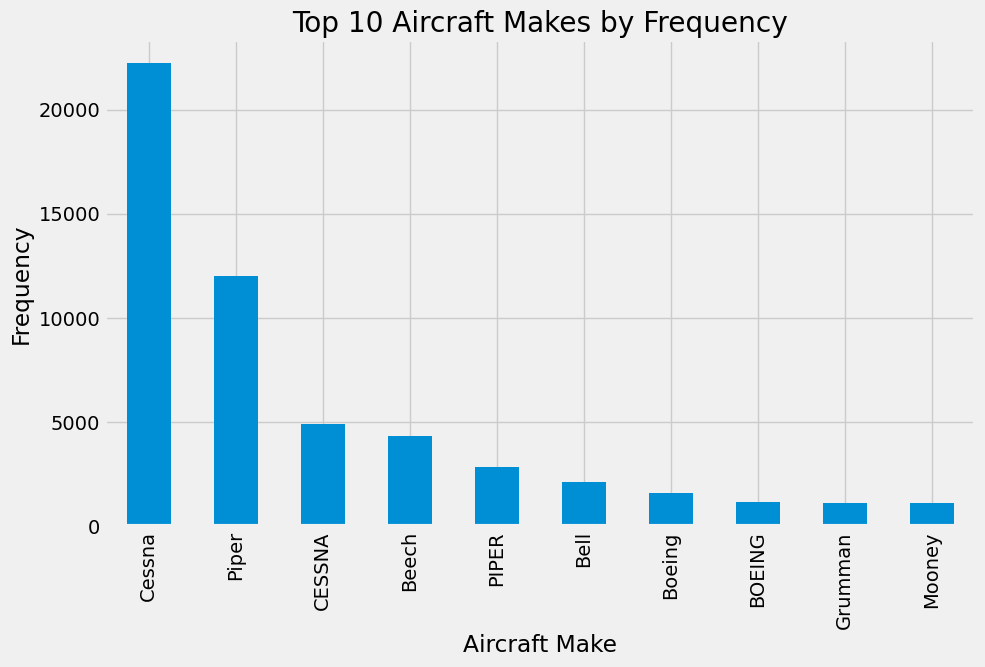

In [108]:
# Plot the top 10 aircraft models by frequency and describe the total_fatal_injuries column.
plt.figure(figsize=(10, 6))
df['make'].value_counts().head(10).plot(kind='bar', title='Top 10 Aircraft Makes by Frequency')
plt.xlabel('Aircraft Make')
plt.ylabel('Frequency')
plt.show()

The bar chart shows the top 10 aircraft manufacturers based on the frequency of their occurrences in the dataset. This visualization helps us identify which manufacturers are most commonly involved in aviation events. Each bar represents an aircraft manufacturer, with its height indicating the number of occurrences. This analysis is crucial for understanding which manufacturers are more frequently associated with aviation events, aiding in the identification of patterns and trends in aircraft safety and reliability.

#### Numerical Variable

In [110]:
print(df['total.fatal.injuries'].describe())

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: total.fatal.injuries, dtype: float64


We apply descriptive statistics to summarize the total_fatal_injuries column. This provides insights into the distribution, central tendency, and spread of fatal injuries in aviation events.

### Bivariate Analysis

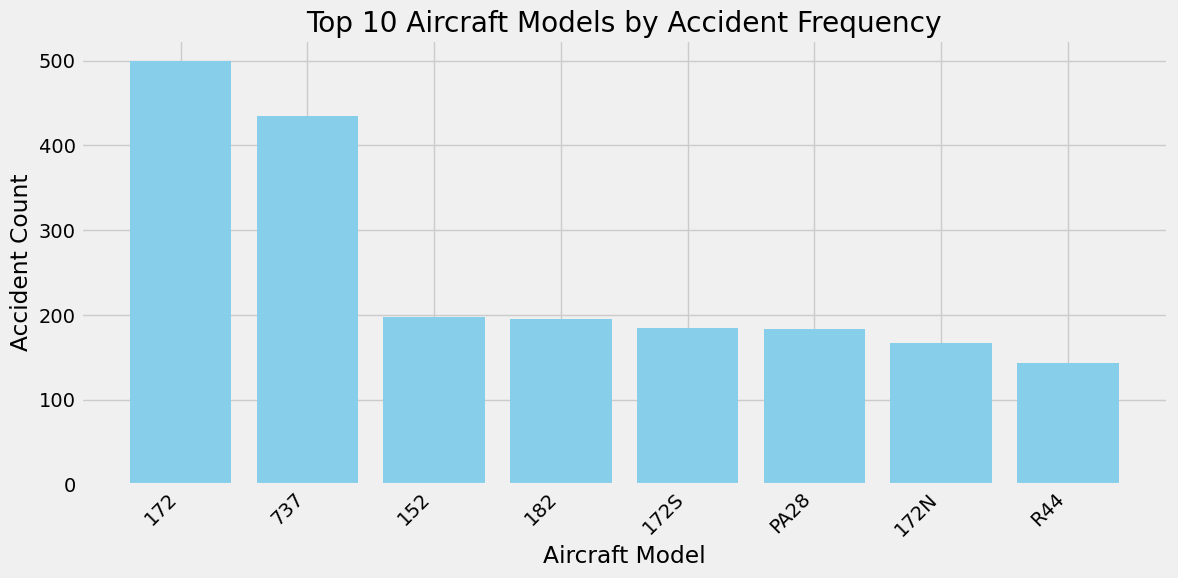

In [112]:
# Accident counts by aircraft make and model
accident_summary = recent_data.groupby(['make','model']).agg({'event.date': 'count','total.fatal.injuries': 'sum','total.serious.injuries': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
top_accidents = accident_summary.sort_values(by='event.date', ascending=False).head(10)
plt.bar(top_accidents['model'], top_accidents['event.date'], color='skyblue')
plt.xlabel('Aircraft Model')
plt.ylabel('Accident Count')
plt.title('Top 10 Aircraft Models by Accident Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart shows the top 10 aircraft models based on the frequency of accidents in the dataset. This visualization helps us identify which specific aircraft models are most commonly involved in aviation events. Each bar represents an aircraft model, with its height indicating the number of accidents associated with that model. This analysis is crucial for understanding which aircraft models have higher accident rates, thereby guiding our decisions to avoid models with a higher risk profile and focus on safer alternatives.

### Multivariate Analysis

In [113]:
# Analyzing relationships between multiple variables

# Verify column names
print(df.columns)

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')


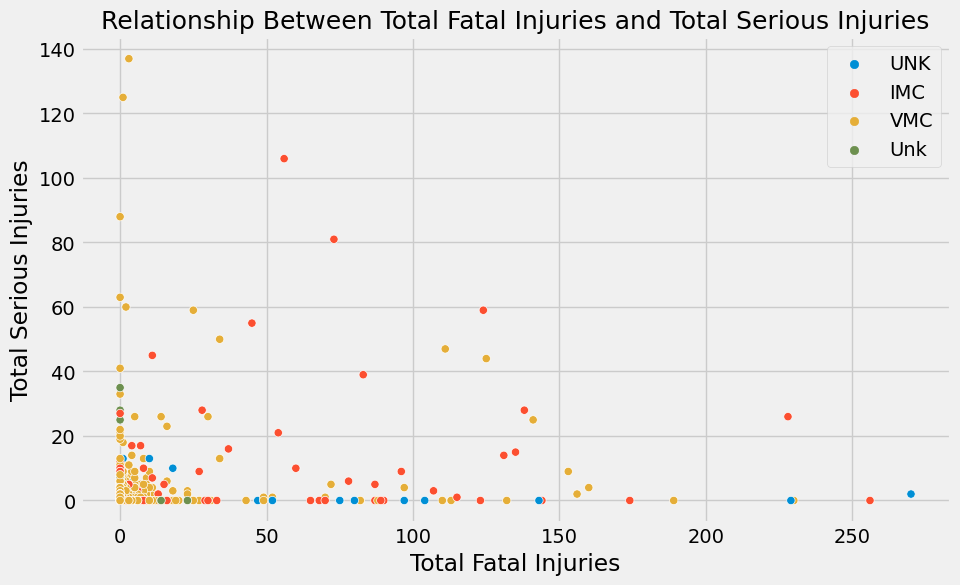

In [119]:
# Scatter plot to analyze relationships between total fatal injuries and total serious injuries with weather conditions
scatter_plot_title = 'Relationship Between Total Fatal Injuries and Total Serious Injuries'
fatal_injury_label = 'Total Fatal Injuries'
serious_injury_label = 'Total Serious Injuries'

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with hue reflecting weather conditions
sns.scatterplot(
    x='total.fatal.injuries', 
    y='total.serious.injuries', 
    hue='weather.condition', 
    data=df, 
    ax=ax,
    marker='o'
)

# Title and labels
ax.set_title(scatter_plot_title, fontsize=18)
ax.set_xlabel(fatal_injury_label)
ax.set_ylabel(serious_injury_label)

# Fixing the position of the legend
plt.legend(loc='upper right')

plt.show()

The scatter plot shows the relationship between total fatal injuries and total serious injuries in aviation events, with the weather conditions at the time of the accident reflected by the color of each point. This visualization helps us understand how different weather scenarios correlate with the severity of injuries. Each point represents an individual aviation event, positioned based on the number of fatal and serious injuries. The color coding by weather conditions allows us to identify patterns and trends related to weather. This analysis is crucial for understanding the impact of weather on aviation safety and for making informed decisions to enhance safety measures.

## Conclusion

In conclusion, we have discovered key aircraft models that demonstrate lower accident frequencies and minimal severe injuries. This information is crucial in guiding our purchase decisions to ensure we select the safest and most reliable aircraft.

**Observation 1**: By analyzing the dataset, we identified aircraft models that are involved in fewer accidents compared to others. These models consistently show lower numbers of recorded incidents over the years. Aircraft with lower accident frequencies are safer, reducing the likelihood of future incidents. This is critical for operational safety and maintaining the company’s reputation.

**Observation 2**: We also focused on the severity of injuries in the accidents. Some aircraft models not only have fewer accidents but also result in fewer severe injuries when accidents do occur. Choosing an aircraft that has a track record of minimal severe injuries ensures higher safety standards for passengers and crew. This translates to greater confidence and trust in the airline’s safety measures.


## Recommendations

1. Choose an Aircraft with the Lowest Accident Rates i.e. prioritize aircraft models like the G103 and Kitfox II, which show lower accident frequencies.
     - Reason: Lower accident rates translate to reduced operational risks and potentially lower insurance premiums.
  
2. Focus on models like the EPIC LT and PITTS MODEL 12, which have reported no fatalities and minimal serious injuries.
     - Reason: Aircraft with fewer severe injuries are indicative of better safety records and robust engineering, ensuring passenger safety and confidence.

3. Develop and implement rigorous training programs and enhanced safety protocols to mitigate risks.
     - Reason: Proactive measures in training and safety can mitigate risks and enhance the overall safety record of the aviation division.